In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics

# -------------------------------------------------------------------------------
# import scripts
from data_processing import hiring_data
import functions.algorithmic_model as am
import functions.selection_algorithm as selection
import functions.simulation_vis as sm_vis

<string>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<string>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id', 'company'])
y = hiring_data['decision']

beta = [0, 0.3, 0.8]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2 = am.logistic_regression(X,y, "logistic", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

------------------------------
Mean: 0.3723873729045834
Mean: 0.35784
------------------------------
Mean: 0.3713654048466353
Mean: 0.42904
------------------------------
Mean: 0.37012647300644846
Mean: 0.53144


# Random Forest Model - No Group Fairness

In [4]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2 = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

------------------------------
Mean: 0.22405914419734915
Mean: 0.20624
------------------------------
Mean: 0.22961306842249637
Mean: 0.29848
------------------------------
Mean: 0.22579238051959952
Mean: 0.42168


# Logistic Model - Statistical Parity

In [5]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

for discrimination in beta: 
    X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

------------------------------
Mean: 0.06693357557709657
Mean: 0.04456
------------------------------
Mean: 0.06681249985242477
Mean: 0.144
------------------------------
Mean: 0.07106265493087638
Mean: 0.2716


# Random Forest Model - Statistical Parity

In [6]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

for discrimination in beta: 
    X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

------------------------------
Mean: -0.2794206075678631
Mean: -0.29656
------------------------------
Mean: -0.2839446494116742
Mean: -0.19832
------------------------------
Mean: -0.2798964409267768
Mean: -0.0492


# Logistic Model - Equalized Odds

In [7]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

------------------------------
Mean: 0.12964175711334056
Mean: 0.11392000000000001
------------------------------
Mean: 0.13506206859473488
Mean: 0.21184
------------------------------
Mean: 0.13352727137421253
Mean: 0.3308


# Random Forest Model - Equalized Odds

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

------------------------------
Mean: 0.2283377865852017
Mean: 0.19904
------------------------------
Mean: 0.22619972780973
Mean: 0.29656
------------------------------
Mean: 0.2286130122563584
Mean: 0.41768


# Logistic Model - Equal Opportunity

In [9]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

------------------------------
Mean: 0.16145699908252464
Mean: 0.1332
------------------------------
Mean: 0.16215203552968116
Mean: 0.23112
------------------------------
Mean: 0.16450632347330574
Mean: 0.3496


# Random Forest Model - Equal Opportunity

In [10]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

------------------------------
Mean: 0.16809877637111
Mean: 0.138
------------------------------
Mean: 0.17292603986221677
Mean: 0.25752
------------------------------
Mean: 0.17344105563113826
Mean: 0.37744


# Simulation Evaluation

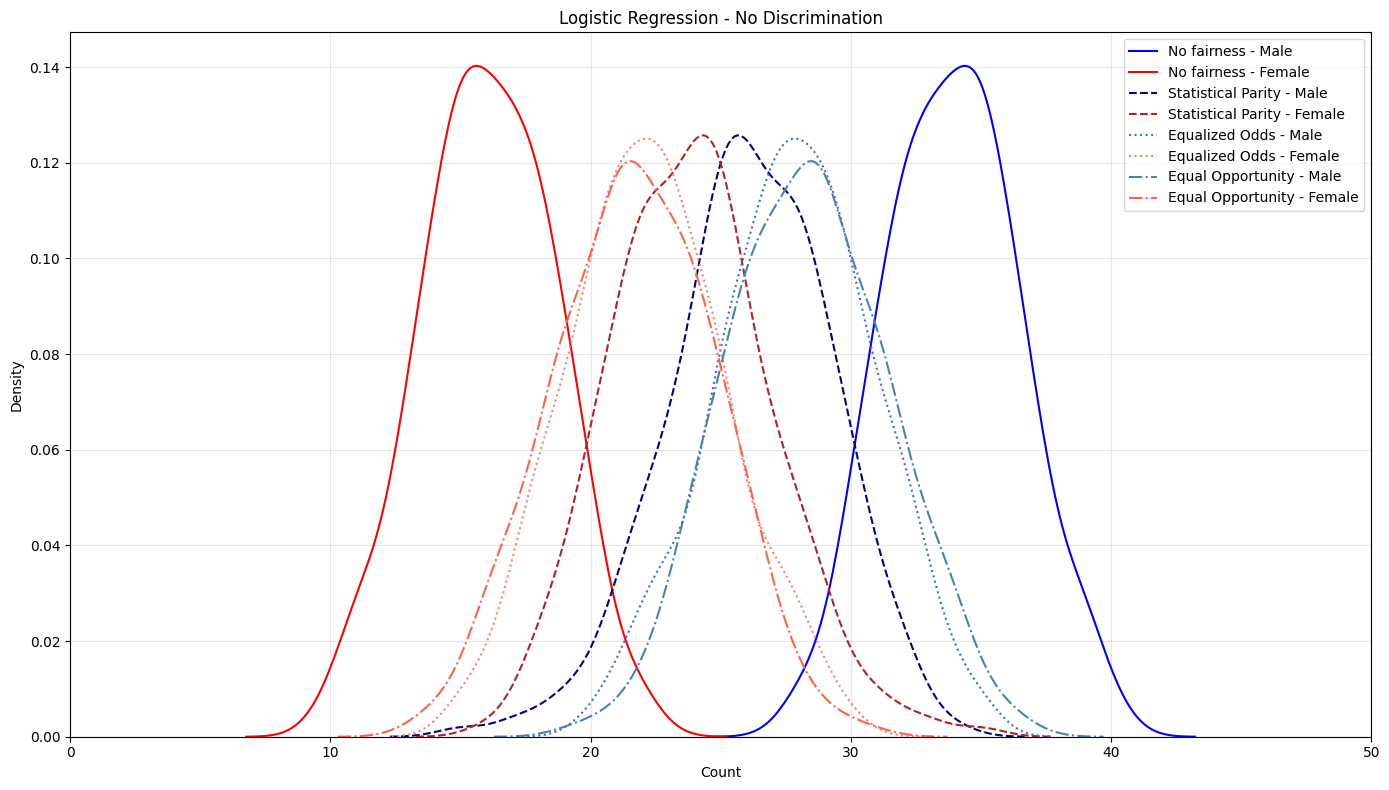

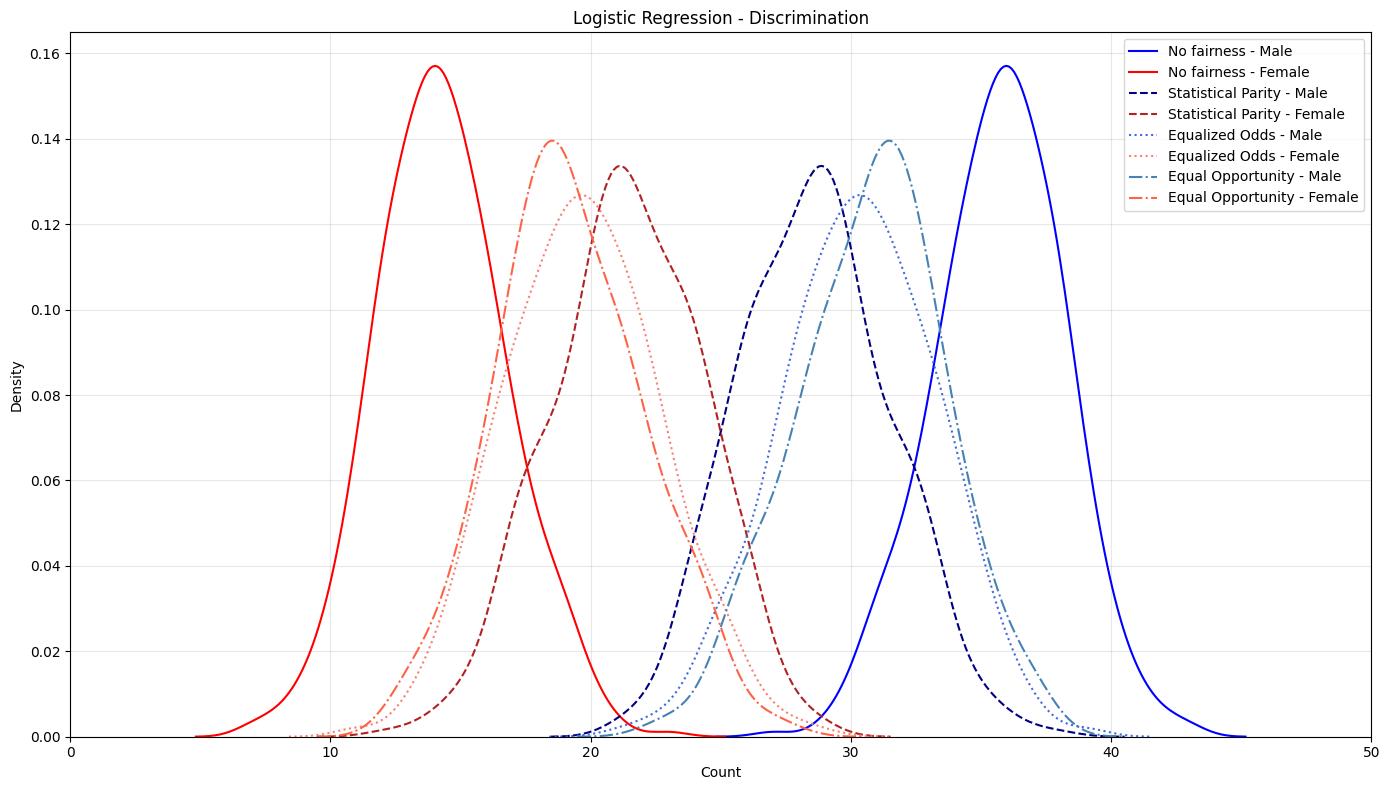

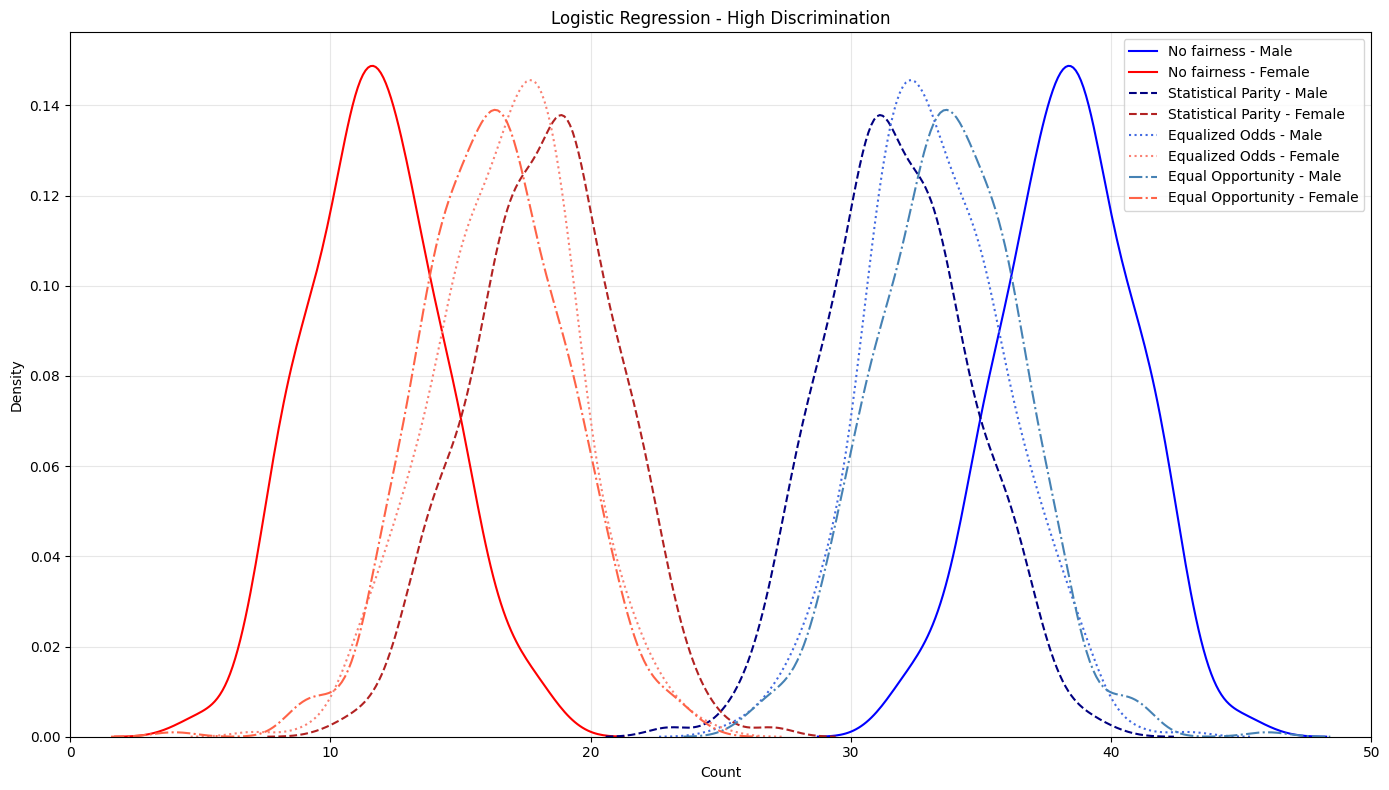

In [11]:
# Ignore specific FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

for (res1, res2, res3, res4), title in zip(zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), titles):
    fig = sm_vis.plot_multiple_gender_distribution_kde(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title
    )

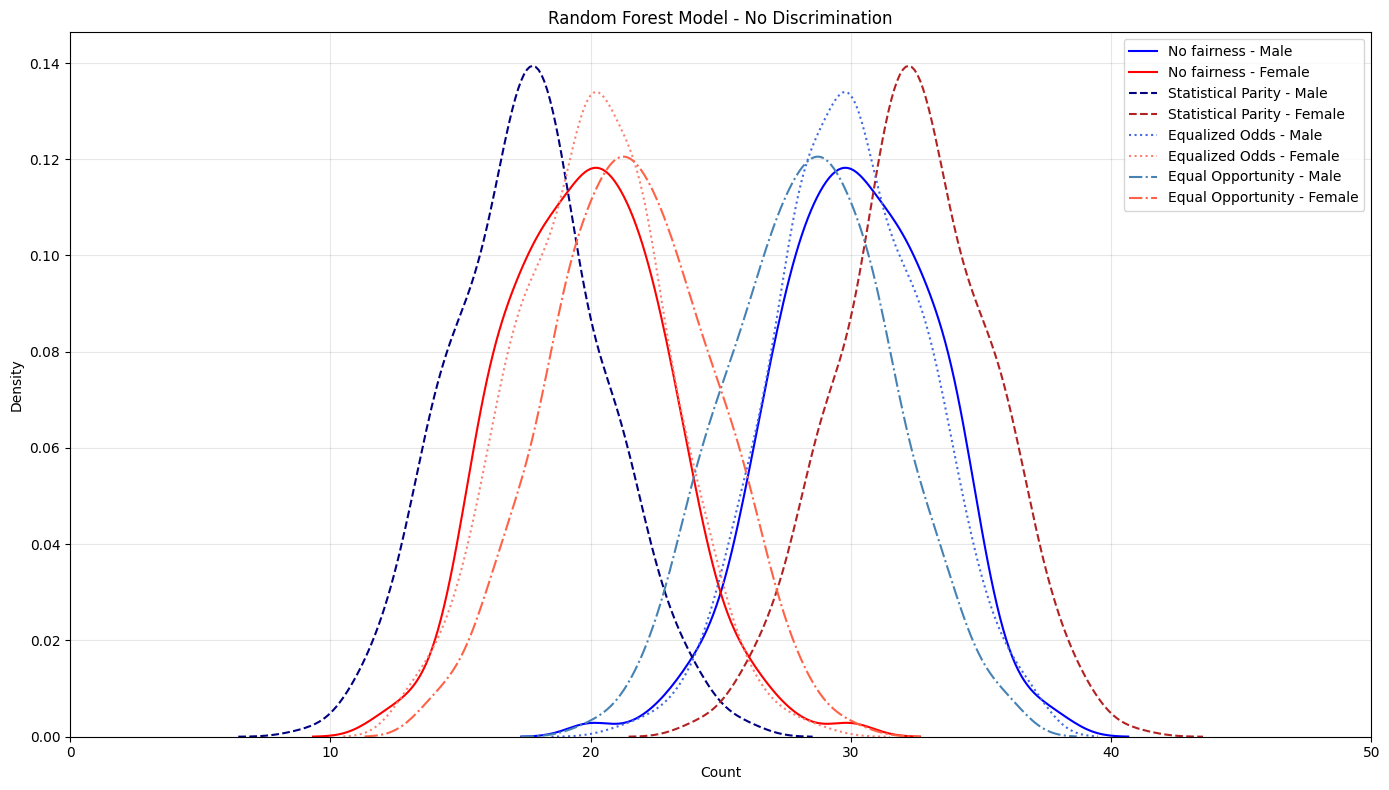

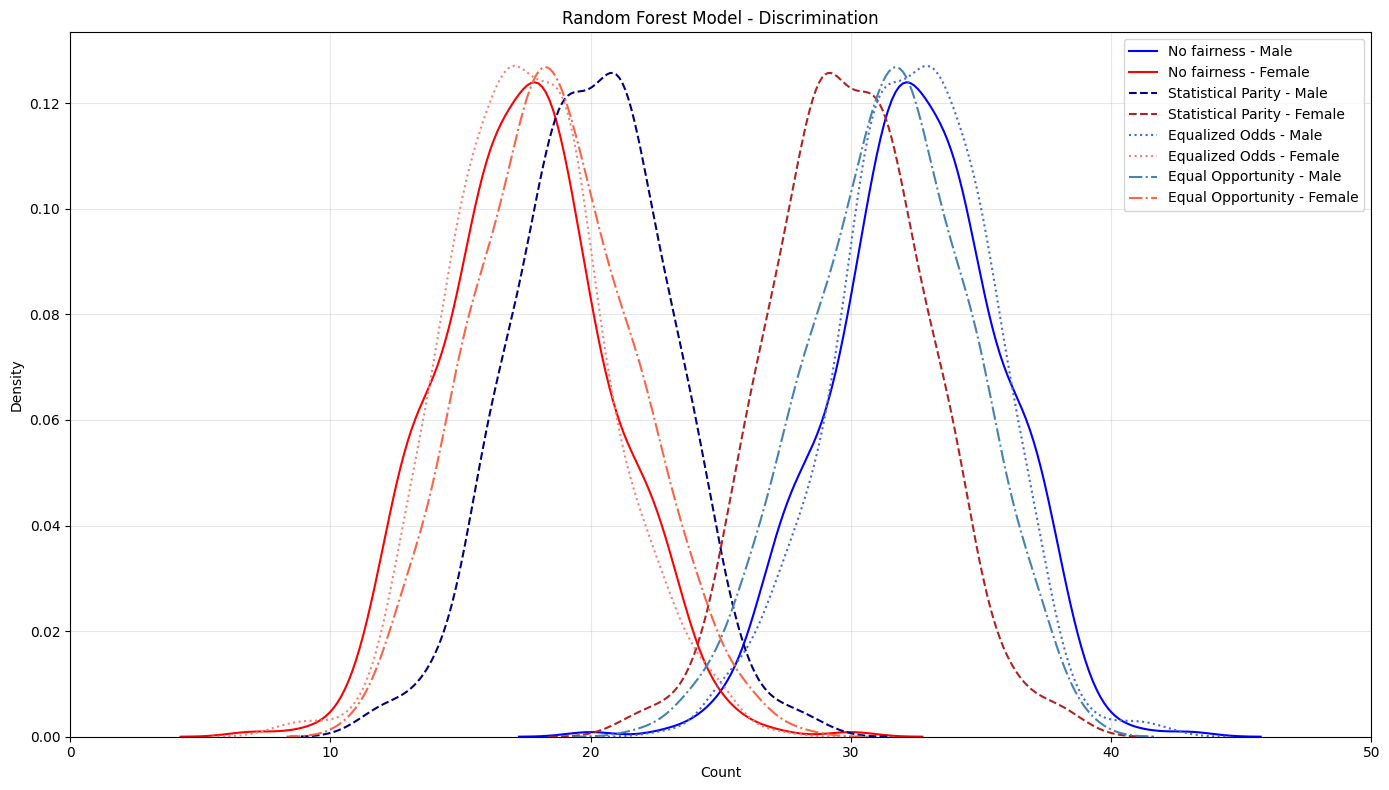

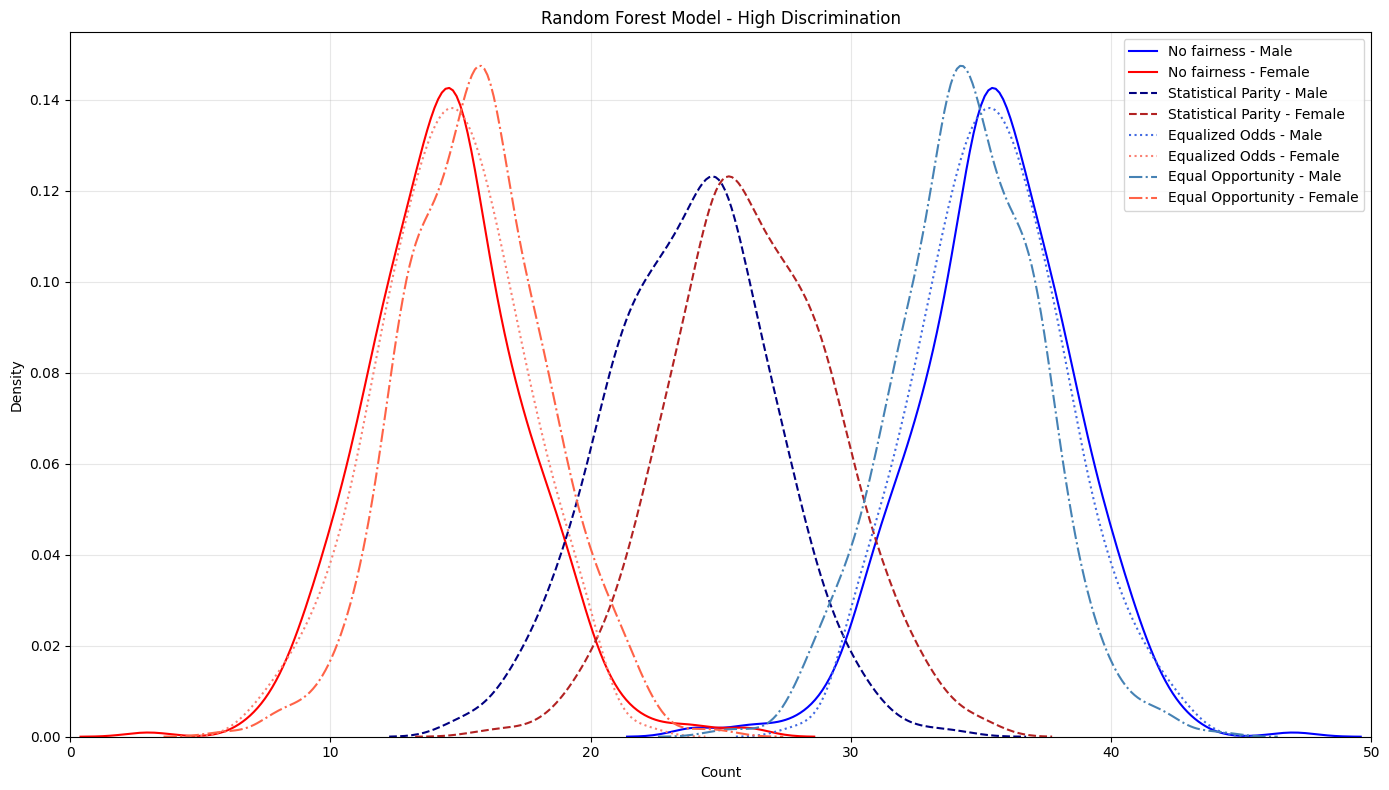

In [12]:
# Ignore specific FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

for (res1, res2, res3, res4), title in zip(zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), titles):
    fig = sm_vis.plot_multiple_gender_distribution_kde(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title
    )